In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
import datetime as dt
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import sklearn.metrics as metrics

In [2]:
# Importing the dataset
df=pd.read_csv(r'C:\Users\HP\Desktop\Capstone project 3\Electricity Consumption.csv')

In [3]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
#Changing datatype of column from string to datetime
df['DATE']= df['DATE'].astype('Datetime64')

In [6]:
#Extracting month and year from date
df['Year']= df['DATE'].dt.year
df['Month']= df['DATE'].dt.month

In [7]:
# Creating pivot table to check if we have any missing values
pd.pivot(data=df, columns= 'Month', index='Year', values='Electricty_Consumption_in_TW')
# No missing values

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


<AxesSubplot:xlabel='Year'>

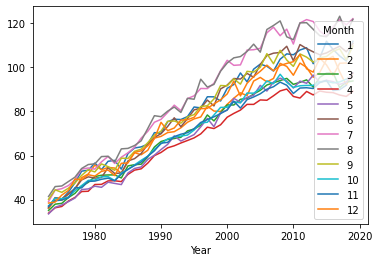

In [8]:
# Checking trend for each month
pd.pivot(data=df, columns= 'Month', index='Year', values='Electricty_Consumption_in_TW').plot(kind='line')

In [9]:
# Setting the date column as the index 
df=df.set_index('DATE')

In [10]:
ts=df['Electricty_Consumption_in_TW']

<AxesSubplot:xlabel='DATE'>

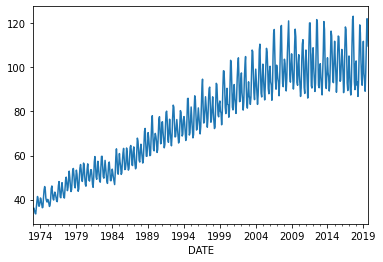

In [11]:
ts.plot(kind='line')

# By Decomposition

In [12]:
# Multiplicative decomposition
mul_decomp= seasonal_decompose(ts, model='multiplicative',two_sided=False, extrapolate_trend=4)

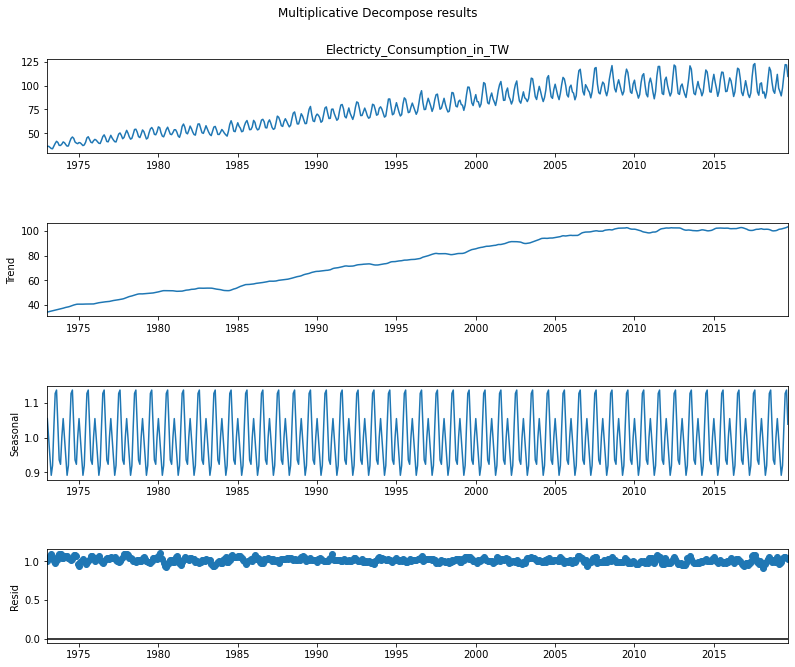

In [13]:
# Plotting the results of multiplicative decomposition
fig=mul_decomp.plot()
fig.set_figwidth(12)
fig.set_figheight(10)
fig.suptitle('Multiplicative Decompose results')
plt.show()

In [14]:
# Showing all the components seperately
pd.concat([mul_decomp.trend, mul_decomp.seasonal, mul_decomp.resid, mul_decomp.observed], axis=1)

,trend,seasonal,resid,Electricty_Consumption_in_TW
DATE,,,,
1973-01-01,34.092018,1.054397,1.000731,35.9728
1973-02-01,34.357224,0.996618,1.055266,36.1334
1973-03-01,34.622430,0.946374,1.070096,35.0625
1973-04-01,34.887636,0.891631,1.087913,33.8416
1973-05-01,35.152842,0.919530,1.036710,33.5107
...,...,...,...,...
2019-05-01,101.805712,0.919530,1.042437,97.5860
2019-06-01,102.143504,1.030825,1.052862,110.8580
2019-07-01,102.417300,1.126577,1.058246,122.1014


In [15]:
# Additive decomposition
add_decomp= seasonal_decompose(ts, model='additive', two_sided=False, extrapolate_trend=4)

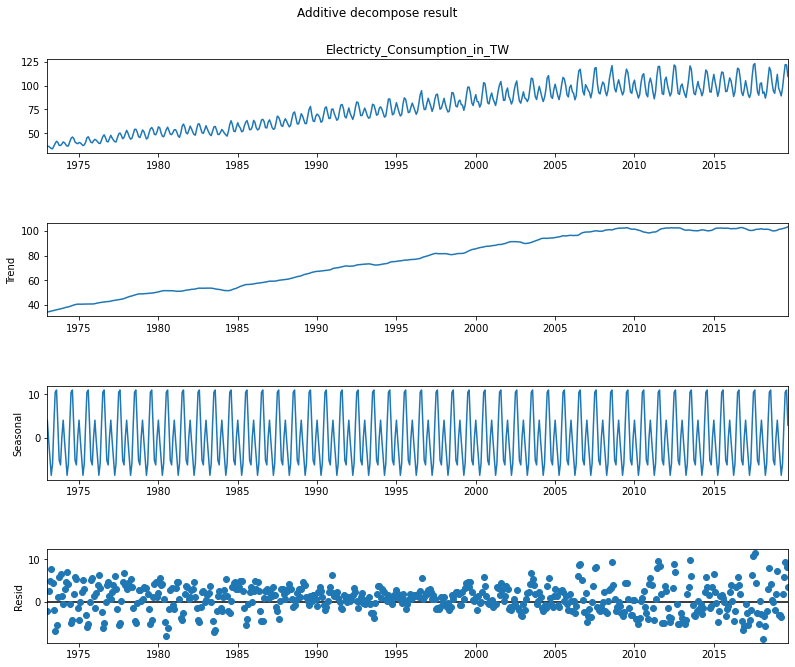

In [16]:
# Plotting the result of additive decomposition
fig= add_decomp.plot()
fig.set_figheight(10)
fig.set_figwidth(12)
fig.suptitle('Additive decompose result')
plt.show()

In [17]:
# Showing all the components seperately
pd.concat([add_decomp.trend,add_decomp.seasonal, add_decomp.resid, add_decomp.observed], axis=1)

,trend,seasonal,resid,Electricty_Consumption_in_TW
DATE,,,,
1973-01-01,34.092018,4.007808,-2.127026,35.9728
1973-02-01,34.357224,-0.709808,2.485983,36.1334
1973-03-01,34.622430,-4.414937,4.855007,35.0625
1973-04-01,34.887636,-8.645945,7.599909,33.8416
1973-05-01,35.152842,-5.974185,4.332043,33.5107
...,...,...,...,...
2019-05-01,101.805712,-5.974185,1.754472,97.5860
2019-06-01,102.143504,2.953507,5.760989,110.8580
2019-07-01,102.417300,10.423584,9.260516,122.1014


# Single exponential smoothing

In [18]:
# Splitting the timeseries in train and test
test= ts['2018-12-01':]
train= ts[:'2018-11-01']

In [19]:
# This function is used to find the best parameters for ExponentialSmoothening model by iterative approach
def auto_params(series, val_split_date=None ,alpha=[None], beta=[None], gamma=[None],phi=[None], trend=None, seasonal=None, periods=12, verbose= None):
    actual= series[val_split_date :]
    best_params=[]
    for a in alpha:
        for b in beta:
            for g in gamma:
                for p in phi:
                    if verbose==True:
                        print(f'Trying model for: alpha: {a}, beta: {b}, gamma: {g}, phi: {p}')
                    model= ExponentialSmoothing(series, trend=trend, seasonal=seasonal,seasonal_periods=periods)
                    model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g, damping_trend=p)
                    f_cast= model.predict(model.params, start=actual.index[0])
                    f_cast=f_cast.round(5)
                    if np.isnan(f_cast).sum() ==0:
                        score = np.where(np.float64(metrics.mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(metrics.mean_absolute_error(actual, f_cast)/actual).mean(),0)
                        best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'phi': p, 'mae': score})
    return min(best_params, key=lambda x: x['mae'])


In [20]:
# auto_params(ts, val_split_date = '2018-12-01', alpha= [0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.8, 0.9],gamma = [0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7,0.9],beta= [0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.8, 0.9], trend='multiplicative', seasonal='multiplicative', periods=12, verbose=False)

In [21]:
# Building model
ets_model= ExponentialSmoothing(train, seasonal='mul',trend='mul',seasonal_periods=12)
ets_model=ets_model.fit(smoothing_level=0.1,smoothing_slope=0.5,smoothing_seasonal=0.2)

Generating Metrics

In [22]:
train_pred = ets_model.fittedvalues['2017-12-01':]
train_actual= ts['2017-12-01':]

In [23]:
# Backward testing
print('MAPE:',np.mean(abs(train_actual-train_pred)/train_actual))
print('RMSE:',np.sqrt(np.mean(np.square(train_actual-train_pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((train_actual - train_pred) / train_actual)))))

MAPE: 0.026584026879434355
RMSE: 3.8328819487976795
RMSPE: 0.04049803220913591


In [24]:
# Forward testing
pred=ets_model.forecast(steps=10)
print('MAPE:',np.mean(abs(test-pred)/test))
print('RMSE:',np.sqrt(np.mean(np.square(test-pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((test - pred) / test)))))

MAPE: 0.0389039529276962
RMSE: 4.763943324071857
RMSPE: 0.043277803374547154


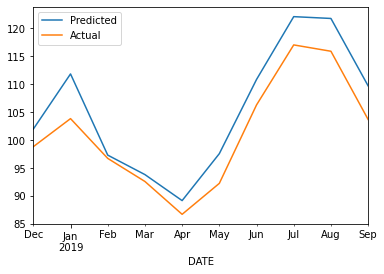

In [25]:
# Plotting the differnce between actual and predicted time series
plt.figure()
test.plot()
pred.plot()
plt.legend(['Predicted','Actual'])

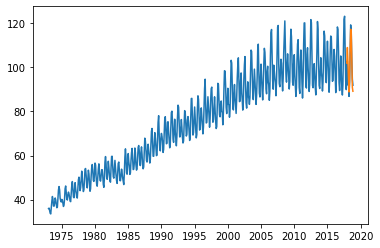

In [26]:
# Plotting the predicted value
plt.plot(train)
plt.plot(train_pred)

In [27]:
# Final ETS model will be built with full data because we splitted the data in train and test to find the best parameters
ets_final_model= ExponentialSmoothing(ts, seasonal='mul',trend='mul',seasonal_periods=12)
ets_final_model=ets_final_model.fit(smoothing_level=0.1,smoothing_slope=0.5,smoothing_seasonal=0.2)

In [28]:
# Forecasting the demand for next 2 years
ets_final_model.forecast(steps=24)

2019-10-01     97.885534
2019-11-01     96.114157
2019-12-01    106.862572
2020-01-01    113.859646
2020-02-01    104.950195
2020-03-01    101.142454
2020-04-01     95.504681
2020-05-01    102.693661
2020-06-01    118.473478
2020-07-01    131.064938
2020-08-01    130.604862
2020-09-01    117.560859
2020-10-01    104.947961
2020-11-01    103.048779
2020-12-01    114.572692
2021-01-01    122.074603
2021-02-01    112.522337
2021-03-01    108.439868
2021-04-01    102.395330
2021-05-01    110.102994
2021-06-01    127.021323
2021-07-01    140.521255
2021-08-01    140.027985
2021-09-01    126.042858
Freq: MS, dtype: float64

In [29]:
# Exporting the forecasted value in a csv file
ets_data = (ets_final_model.forecast(steps=24)).to_frame().to_csv('ETS_results.csv', index = True)

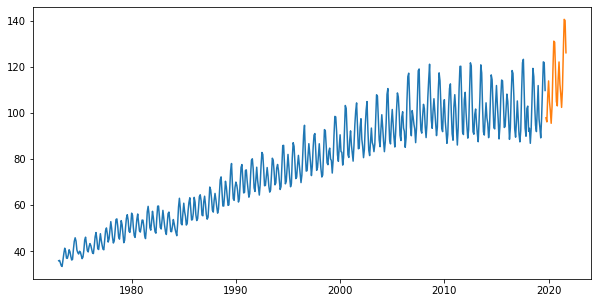

In [30]:
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.plot(ets_final_model.forecast(steps=24))

# ARIMA/ SARIMA model


In [31]:
# Finding the value for parameters, This is just for deminstration purpose
from statsmodels.tsa.stattools import adfuller
print('Pvalue:',adfuller(ts)[1])
print('Pvalue with log:',adfuller(np.log(ts).diff(1).dropna())[1])
print('d: 1')
print('yt= log(ts)')
ln_ts= np.log(ts)
ln_ts_diff= np.log(ts).diff(1).dropna()

Pvalue: 0.410328160446865
Pvalue with log: 1.4034181751303514e-09
d: 1
yt= log(ts)


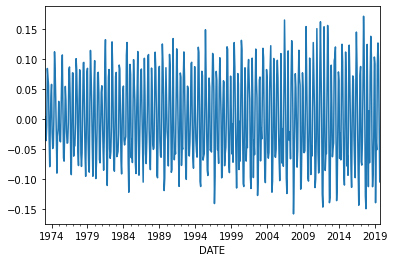

In [32]:
# We can see that taking the log and differencing the series one time is enought to convert the non-stationary series to 
#a stationary series
ln_ts_diff.plot()
plt.show()

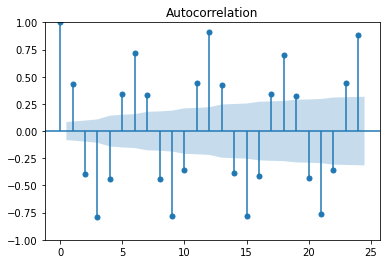

In [33]:
# Plotting the auto-correlation function, this also indicates the series is stationary
sm.graphics.plot_acf(ln_ts_diff, lags=24)
plt.show()

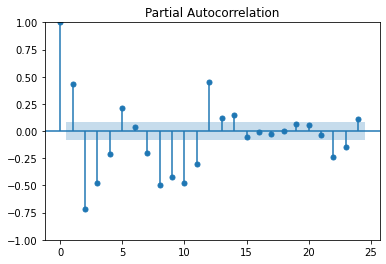

In [34]:
# Plotting the partial auto-correlation function
sm.graphics.plot_pacf(ln_ts_diff, lags=24)
plt.show()

In [35]:
# SARIMA MODEL
# Because the base series is non-stationary, we have to use SARIMA model

In [36]:
# Taking logs of train and test data
ln_train= np.log(train)
ln_test= np.log(test)

In [37]:
# User defined function to find the best value for parameters
import sys
import itertools
import warnings


def auto_arima(timeseries, regressors= None,p=range(0,3), d=range(0,1), q= range(0,3), P=range(0,3), D=range(0,1), Q= range(0,3), verbose=False):
    
    pdq= list(itertools.product(p,d,q))
    seasonal_pdq = [(i[0],i[1],i[2], 12) for i in pdq]
    
    best_aic= np.inf
    best_pdq= None
    best_seasonal_pdq= None
    best_results= None
    
    for parmas in pdq:
        for param_seasonal in seasonal_pdq:
            model= sm.statespace.SARIMAX(endog=timeseries, 
                                         order=parmas, 
                                         seasonal_order=param_seasonal, 
                                         exog= regressors,
                                         enforce_invertibility= False,
                                         enforce_stationarity=False)
            temp_results= model.fit()
            if verbose== True:
                print("SARIMAX{}X{}: {}".format(parmas, param_seasonal, temp_results.aic))
                
            if temp_results.aic< best_aic:
                best_aic= temp_results.aic
                best_pdq= parmas
                best_seasonal_pdq= param_seasonal
                best_results = temp_results
    print(f'Best Parameters: {best_pdq}X{best_seasonal_pdq}')

In [38]:
# best_results = auto_arima(ln_train,  p=range(0, 3), d=range(0, 2), q=range(0, 3),
#                          P=range(0, 3), D=range(0, 2), Q=range(0, 3), verbose=True) 

In [39]:
#SARIMA model
SARIMA_model= sm.statespace.SARIMAX(ln_train, 
                                         order=(2, 1, 2), 
                                         seasonal_order=(1, 0, 1, 12),
                                         enforce_invertibility= False,
                                         enforce_stationarity=False).fit()

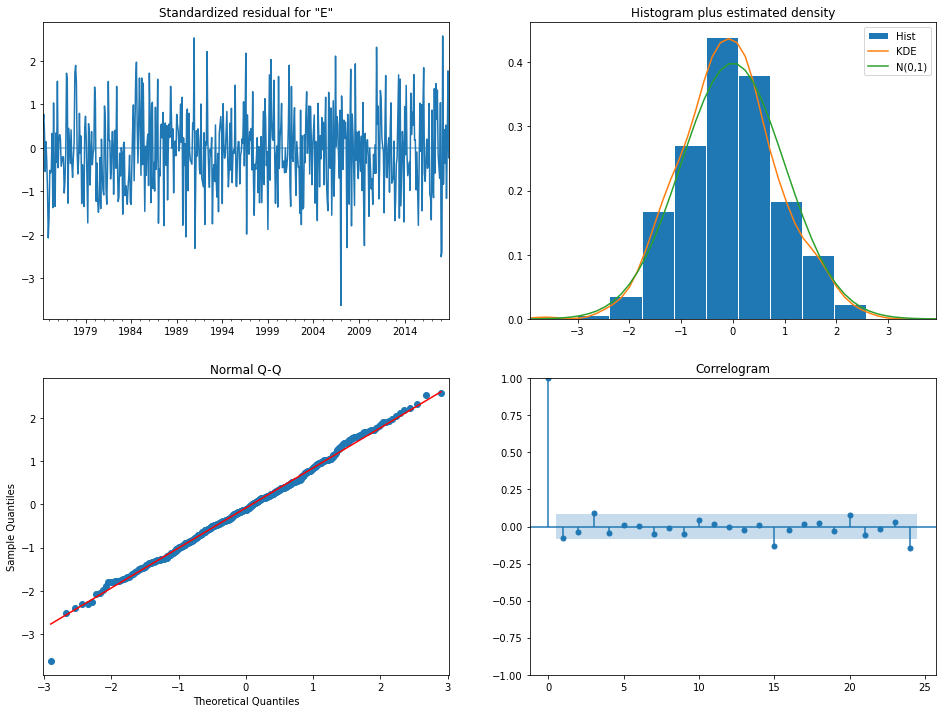

In [40]:
SARIMA_model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

In [41]:
sarima_train_pred = np.exp(SARIMA_model.fittedvalues['2017-12-01':])
train_actual= ts['2017-12-01':]

In [42]:
# Backward testing
print('MAPE:',np.mean(abs(train_actual-sarima_train_pred)/train_actual))
print('RMSE:',np.sqrt(np.mean(np.square(train_actual-sarima_train_pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((train_actual - sarima_train_pred) / train_actual)))))

MAPE: 0.025756436112339895
RMSE: 3.171226163033661
RMSPE: 0.03248514741768254


In [43]:
# Forward testing
sarima_pred=np.exp(SARIMA_model.forecast(steps=10))
print('MAPE:',np.mean(abs(test-sarima_pred)/test))
print('RMSE:',np.sqrt(np.mean(np.square(test-sarima_pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((test - sarima_pred) / test)))))

MAPE: 0.025380129175436122
RMSE: 3.240942356536761
RMSPE: 0.02995267970027479


In [44]:
# Final SARIMA model will be built on the entire data
Final_SARIMA_model= sm.statespace.SARIMAX(ln_ts, 
                                         order=(2, 1, 2), 
                                         seasonal_order=(1, 0, 1, 12),
                                         enforce_invertibility= False,
                                         enforce_stationarity=False).fit()

In [45]:
# Predicting the future demands for 24 months
np.exp(Final_SARIMA_model.forecast(steps=24))

2019-10-01     96.458003
2019-11-01     93.815399
2019-12-01    103.911881
2020-01-01    110.065791
2020-02-01    101.012865
2020-03-01     96.465963
2020-04-01     90.275695
2020-05-01     96.567961
2020-06-01    111.425781
2020-07-01    123.133254
2020-08-01    122.375408
2020-09-01    109.236724
2020-10-01     96.422250
2020-11-01     94.128840
2020-12-01    104.564549
2021-01-01    110.905076
2021-02-01    101.741259
2021-03-01     97.127960
2021-04-01     90.843956
2021-05-01     97.222620
2021-06-01    112.303358
2021-07-01    124.198181
2021-08-01    123.427411
2021-09-01    110.078403
Freq: MS, Name: predicted_mean, dtype: float64

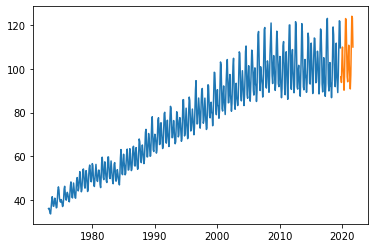

In [46]:
plt.plot(ts)
plt.plot(np.exp(Final_SARIMA_model.forecast(steps=24)))

In [50]:
# Exporting the forecasted value in a csv file
ets_data = np.exp(Final_SARIMA_model.forecast(steps=24)).to_frame().to_csv('SARIMA_results.csv', index = True)